In [1]:
import pandas as pd
import numpy as np

In [3]:
import uproot

files = [
    "/ceph/programmierkurs/pandas/B2HHH_MagnetUp.root",
    "/ceph/programmierkurs/pandas/B2HHH_MagnetDown.root"
]
data = pd.DataFrame()
for file in files:
    with uproot.open(file) as f:
        data = pd.concat([data, f['DecayTree'].arrays(library="pd")],
                         ignore_index=True)

In [4]:
class LorentzVector:

    def __init__(self, e, p1, p2, p3):
        self.e = e
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3

    def __repr__(self):
        return f"({self.e},{self.p1},{self.p2},{self.p3})"

    __str__ = __repr__

    def __mul__(self, other):
        E_g = self.e * other.e
        P1_g = self.p1 * other.p1
        P2_g = self.p2 * other.p2
        P3_g = self.p3 * other.p3
        return E_g - (P1_g + P2_g + P3_g)

    def __add__(self, other):
        e_g = self.e + other.e
        p1_g = self.p1 + other.p1
        p2_g = self.p2 + other.p2
        p3_g = self.p3 + other.p3
        return LorentzVector(e_g, p1_g, p2_g, p3_g)

    @property
    def m(self):
        return (self * self)**0.5

    @staticmethod
    def from_m(m, p1, p2, p3):
        e = (m**2 + (p1**2 + p2**2 + p3**2))**0.5
        return LorentzVector(e, p1, p2, p3)

In [5]:
M_K = 493.677

In [6]:
p1 = LorentzVector.from_m(M_K, data["H1_PX"], data["H1_PY"], data["H1_PZ"])
p2 = LorentzVector.from_m(M_K, data["H2_PX"], data["H2_PY"], data["H2_PZ"])
p3 = LorentzVector.from_m(M_K, data["H3_PX"], data["H3_PY"], data["H3_PZ"])

In [7]:
p_B = p1 + p2 + p3

<AxesSubplot:>

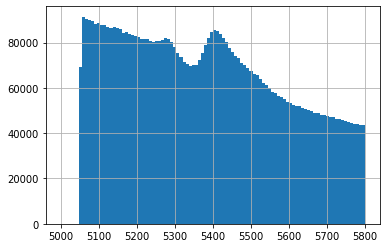

In [8]:
p_B.m.hist(bins=100, range=(5000, 5800))

In [9]:
data["B_M"] = p_B.m

In [10]:
data.columns

Index(['B_FlightDistance', 'B_VertexChi2', 'H1_PX', 'H1_PY', 'H1_PZ',
       'H1_ProbK', 'H1_ProbPi', 'H1_Charge', 'H1_IPChi2', 'H1_isMuon', 'H2_PX',
       'H2_PY', 'H2_PZ', 'H2_ProbK', 'H2_ProbPi', 'H2_Charge', 'H2_IPChi2',
       'H2_isMuon', 'H3_PX', 'H3_PY', 'H3_PZ', 'H3_ProbK', 'H3_ProbPi',
       'H3_Charge', 'H3_IPChi2', 'H3_isMuon', 'B_M'],
      dtype='object')

<AxesSubplot:>

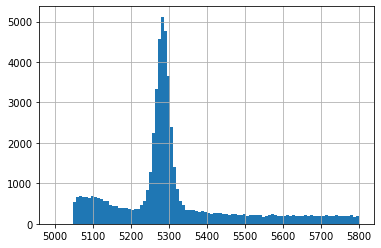

In [16]:
cut = "H1_ProbK>0.3 & H2_ProbK>0.3 & H3_ProbK>0.3"
data_cutted = data.query(cut)
data_cutted["B_M"].hist(bins=100, range=(5000, 5800))

<AxesSubplot:>

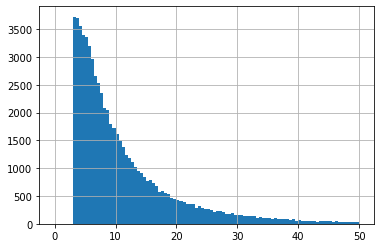

In [17]:
data_cutted["B_FlightDistance"].hist(bins=100, range=(0, 50))